# Lets analyze São Paulo's monuments csv file from the city hall

I got the information from this website here:http://geosampa.prefeitura.sp.gov.br/PaginasPublicas/_SBC.aspx

I want to see where are São Paulo's racists momuments, the type, how old are they, and later see the connections between them and the population in this neighboorhoods.

I asked my friend to help me classify them in yes or no for racists monuments. He has a maters degree in history and had already worked with cultural heritage in the city.


In [46]:
import pandas as pd
import numpy as np

In [47]:
!ls

FinalProject_Monumentos_contraditorios.ipynb
SIRGAS_SETOR_CENSITARIO_2010.zip
SIRGAS_SHP_densidade_demografica_2010.zip
SIRGAS_SHP_distrito
SIRGAS_SHP_distrito.zip
SIRGAS_SHP_monumento
SIRGAS_SHP_monumento.zip
final_project.qgz
pop_race_dsitrict_sp(2).xlsx
tabela3175 (2).xlsx
xls_Monumentos.xlsx - xls_Monumentos (1).csv


### Lets read the csv file

In [68]:
df = pd.read_csv("xls_Monumentos.xlsx - xls_Monumentos (1).csv")
df.head()


,ID,NOME_OBRA,AUTOR,TIPOLOGIA,MATERIAL,DT_IMPLANT,CONPRESP,CONDEPHAAT,TOMBAMENTO,LOCAL,IPHAN,LINK_RES,problematica
0,1.0,14 Bis,FUNCIONÁRIOS do Parque Aeronáutico de Marte,Escultura Figurativa,latăo alumínio bronze e granito,1974 (escultura original) / 2006 (escultura nova),não consta,não consta,não,Praça Campo de Bagatelle,não consta,não consta,N
1,2.0,70 Anos da Imigraçăo Japonesa,desconhecido,Marco,granito,1978,não consta,não consta,não,Parque do Carmo,não consta,não consta,N
2,3.0,A Caçadora,"COLUCCINI, Lélio",Grupo escultórico,Granito e bronze,197-,não consta,não consta,não,Parque Ibirapuera,não consta,não consta,N
3,4.0,A menina e o bezerro,CHRISTOPHE,Grupo escultórico,mármore Carrara e granito,ca. 1922,não consta,não consta,não,Largo do Arouche,não consta,não consta,N
4,6.0,A todos os companheiros,desconhecido,Placa,mármore,1977,não consta,RES. SC 185/02,sim,Largo Săo Francisco (próximo a entrada da Facu...,não consta,não consta,N


In [69]:
df.dtypes

ID              float64
NOME_OBRA        object
AUTOR            object
TIPOLOGIA        object
MATERIAL         object
DT_IMPLANT       object
CONPRESP         object
CONDEPHAAT       object
TOMBAMENTO       object
LOCAL            object
IPHAN            object
LINK_RES         object
problematica     object
dtype: object

### lets count how many monuments are consired racists 

In [70]:
df.groupby(by= 'problematica').count()

,ID,NOME_OBRA,AUTOR,TIPOLOGIA,MATERIAL,DT_IMPLANT,CONPRESP,CONDEPHAAT,TOMBAMENTO,LOCAL,IPHAN,LINK_RES
problematica,,,,,,,,,,,,
N,346,351,351,351,351,351,351,351,351,351,351,351
S,16,16,16,16,16,16,16,16,16,16,16,16


In [71]:
### lets make another dataframe with only the problematic ones
df_racists= df[df.problematica == 'S']
df_racists.head()

,ID,NOME_OBRA,AUTOR,TIPOLOGIA,MATERIAL,DT_IMPLANT,CONPRESP,CONDEPHAAT,TOMBAMENTO,LOCAL,IPHAN,LINK_RES,problematica
28,32.0,Anhangüera,"BRIZZOLLARA, Luis",Estátua,mármore e bronze,1935,não consta,não consta,não,Avenida Paulista (calçada do Parque Tenente Si...,não consta,não consta,S
37,41.0,Augusto de Prima Porta,desconhecido,Estátua,bronze e granito,1948,não consta,não consta,não,Largo do Arouche,não consta,não consta,S
47,53.0,Borba Gato,"GUERRA, Júlio",Estátua (MONUMENTO),concreto armado mosaico de pedras e pastilhas,1963,não consta,não consta,não,Praça Augusto Tortorello de Araújo,não consta,não consta,S
54,60.0,Carlos Botelho,"CARLI, Arlindo Castellane de",Cabeça,bronze e granito,1986,não consta,não consta,não,Parque da Aclimaçăo,não consta,não consta,S
82,90.0,Cristóforo Colombo,"MORRONE, Luiz",Estátua,bronze e granito,1992,não consta,não consta,não,Praça Panamericana,não consta,não consta,S


In [52]:
df_racists.dtypes

ID              float64
NOME_OBRA        object
AUTOR            object
TIPOLOGIA        object
MATERIAL         object
DT_IMPLANT       object
CONPRESP         object
CONDEPHAAT       object
TOMBAMENTO       object
LOCAL            object
IPHAN            object
LINK_RES         object
problematica     object
dtype: object

In [53]:
#what materials are they made? Lets find out
df_racists.groupby(by= 'MATERIAL').count()

,ID,NOME_OBRA,AUTOR,TIPOLOGIA,DT_IMPLANT,CONPRESP,CONDEPHAAT,TOMBAMENTO,LOCAL,IPHAN,LINK_RES,problematica
MATERIAL,,,,,,,,,,,,
bronze e concreto,2,2,2,2,2,2,2,2,2,2,2,2
bronze e granito,8,8,8,8,8,8,8,8,8,8,8,8
bronze granito e mármore,1,1,1,1,1,1,1,1,1,1,1,1
bronze mármore e concreto,1,1,1,1,1,1,1,1,1,1,1,1
concreto armado mosaico de pedras e pastilhas,1,1,1,1,1,1,1,1,1,1,1,1
granito,1,1,1,1,1,1,1,1,1,1,1,1
granitobronze e azulejos,1,1,1,1,1,1,1,1,1,1,1,1
mármore e bronze,1,1,1,1,1,1,1,1,1,1,1,1


In [54]:
# Permanently change DT_IMPLANT to be an integer and later make a chart from it 
df_racists.DT_IMPLANT = df_racists.DT_IMPLANT.astype(int)

ValueError: invalid literal for int() with base 10: '197-'

In [55]:
#okkay, lets find '197-'
df_racists[df_racists.DT_IMPLANT == '197-']

,ID,NOME_OBRA,AUTOR,TIPOLOGIA,MATERIAL,DT_IMPLANT,CONPRESP,CONDEPHAAT,TOMBAMENTO,LOCAL,IPHAN,LINK_RES,problematica
131,139.0,Fundadores de Săo Paulo,"MORRONE, Luiz",Grupo escultórico (MONUMENTO),bronze e granito,197-,não consta,não consta,não,Rua Manoel da Nóbrega (próximo a Avenida Sarge...,não consta,não consta,S


In [56]:
#now lets replace this value by another one
df_racists.DT_IMPLANT = df_racists.DT_IMPLANT.replace("197-", "1963")
df_racists[df_racists.DT_IMPLANT == '197-']

/Users/nexojornal/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ID,NOME_OBRA,AUTOR,TIPOLOGIA,MATERIAL,DT_IMPLANT,CONPRESP,CONDEPHAAT,TOMBAMENTO,LOCAL,IPHAN,LINK_RES,problematica


In [63]:
df_racists.dtypes


ID              float64
NOME_OBRA        object
AUTOR            object
TIPOLOGIA        object
MATERIAL         object
DT_IMPLANT        int64
CONPRESP         object
CONDEPHAAT       object
TOMBAMENTO       object
LOCAL            object
IPHAN            object
LINK_RES         object
problematica     object
dtype: object

<AxesSubplot:>

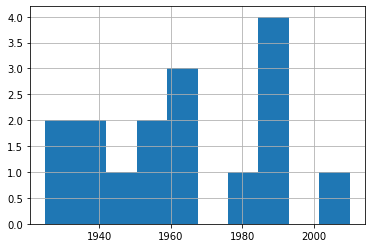

In [64]:
#lets make a histogram to see when they appered in São Paulo
df_racists['DT_IMPLANT'].hist()

In [65]:
df_racists.sort_values(by='DT_IMPLANT', ascending=True)

,ID,NOME_OBRA,AUTOR,TIPOLOGIA,MATERIAL,DT_IMPLANT,CONPRESP,CONDEPHAAT,TOMBAMENTO,LOCAL,IPHAN,LINK_RES,problematica
139,147.0,Glória Imortal Aos Fundadores de Săo Paulo,"ZANI, Amadeo",Coluna,bronze e granito,1925,RES. 17/2007,não consta,sim,Pátio do Colégio,não consta,https://www.prefeitura.sp.gov.br/cidade/upload...,S
104,112.0,Doutor Luís Pereira Barreto,"EMENDABILI, Galileo",Grupo escultórico,bronze e granito,1929,não consta,não consta,não,Praça Marechal Deodoro,não consta,não consta,S
28,32.0,Anhangüera,"BRIZZOLLARA, Luis",Estátua,mármore e bronze,1935,não consta,não consta,não,Avenida Paulista (calçada do Parque Tenente Si...,não consta,não consta,S
87,95.0,Cruz de Anchieta,"LARROCA, Vicente; RODRIGUES, José Wasth",Cruzeiro,granitobronze e azulejos,1938,não consta,não consta,não,Praça Santa Cruz,não consta,não consta,S
37,41.0,Augusto de Prima Porta,desconhecido,Estátua,bronze e granito,1948,não consta,não consta,não,Largo do Arouche,não consta,não consta,S
236,252.0,Monumento às Bandeiras,"BRECHERET, Victor",Grupo escultórico,granito,1953,RES. 05/1991,RES. SC 31/1985,sim,Praça Armando de Salles Oliveira,não consta,https://www.prefeitura.sp.gov.br/cidade/upload...,S
273,291.0,Padre José de Anchieta Apóstolo do Brasil,"USAI, Heitor",Estátua,bronze e granito,1954,não consta,não consta,não,Praça da Sé,não consta,não consta,S
227,243.0,Monumento ao Duque de Caxias,"BRECHERET, Victor",Estátua,bronze e granito,1960,não consta,Pro SC 49698/04,não,Praça Princesa Isabel,não consta,não consta,S
47,53.0,Borba Gato,"GUERRA, Júlio",Estátua (MONUMENTO),concreto armado mosaico de pedras e pastilhas,1963,não consta,não consta,não,Praça Augusto Tortorello de Araújo,não consta,não consta,S
131,139.0,Fundadores de Săo Paulo,"MORRONE, Luiz",Grupo escultórico (MONUMENTO),bronze e granito,1963,não consta,não consta,não,Rua Manoel da Nóbrega (próximo a Avenida Sarge...,não consta,não consta,S


In [60]:
df_racists.groupby(by= 'TOMBAMENTO').count()

,ID,NOME_OBRA,AUTOR,TIPOLOGIA,MATERIAL,DT_IMPLANT,CONPRESP,CONDEPHAAT,LOCAL,IPHAN,LINK_RES,problematica
TOMBAMENTO,,,,,,,,,,,,
não,14,14,14,14,14,14,14,14,14,14,14,14
sim,2,2,2,2,2,2,2,2,2,2,2,2


In [67]:
#okkay,which monuments we can't remove because they are "Tombados" by cultural heritage program
df_racists[df_racists.TOMBAMENTO == 'sim']
##IDS 147,252

,ID,NOME_OBRA,AUTOR,TIPOLOGIA,MATERIAL,DT_IMPLANT,CONPRESP,CONDEPHAAT,TOMBAMENTO,LOCAL,IPHAN,LINK_RES,problematica
139,147.0,Glória Imortal Aos Fundadores de Săo Paulo,"ZANI, Amadeo",Coluna,bronze e granito,1925,RES. 17/2007,não consta,sim,Pátio do Colégio,não consta,https://www.prefeitura.sp.gov.br/cidade/upload...,S
236,252.0,Monumento às Bandeiras,"BRECHERET, Victor",Grupo escultórico,granito,1953,RES. 05/1991,RES. SC 31/1985,sim,Praça Armando de Salles Oliveira,não consta,https://www.prefeitura.sp.gov.br/cidade/upload...,S
